In [9]:
import librosa
# import librosa.display
# import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import os

root_path = "../data/wavs/train/"
wav_list = os.listdir(root_path)
wav_files = [os.path.join(root_path, file) for file in wav_list if file.endswith('.wav')]
print(len(wav_files))
# print(*wav_files, sep='\n')


14


In [10]:
# shape : It's the length of the signal in frames (not samples), depending on window and hop length. See this answer.
# Concretely: 1 + len(y) // hop_length
# hop_length : the length of the non-intersecting portion of window length

def extract_features(y, sr):
  return librosa.feature.melspectrogram(y=y, sr=sr)

def get_peaks(y, sr):
  onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=256, aggregate=np.median) # hop_length : 512
  peaks = librosa.util.peak_pick(onset_env, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.5, wait=10)
  return peaks

inputs = []
outputs = []
for wav_file in wav_files:
  y, sr = librosa.load(wav_file)
  features = extract_features(y, sr)
  peaks = get_peaks(y, sr)
  print(wav_file, features.shape, peaks.shape)
  input = features[peaks[0]]
  inputs.append(input)
  # inputs.append(features)

  output = 0
  if 'Overhead' in wav_file:
    output = 1
  elif 'Snare' in wav_file:
      output = 2
  elif 'Tom' in wav_file:
      output = 3
  else:
      output = 0
  outputs.append(output)

print(inputs)

# kick : 0
# overhead : 1
# snare : 2
# torm : 3
# outputs = [0,0,0,1, 0, 0, 1, 1 ,2,2, 1, 2,2,2]

../data/wavs/train/Overhead Sample 1.wav (128, 87) (1,)
../data/wavs/train/Overhead Sample 2.wav (128, 87) (1,)
../data/wavs/train/Overhead Sample 3.wav (128, 87) (1,)
../data/wavs/train/Overhead Sample 4.wav (128, 87) (1,)
../data/wavs/train/Overhead Sample 5.wav (128, 87) (1,)
../data/wavs/train/Snare Sample 10.wav (128, 87) (1,)
../data/wavs/train/Snare Sample 2.wav (128, 87) (1,)
../data/wavs/train/Snare Sample 4.wav (128, 87) (1,)
../data/wavs/train/Snare Sample 7.wav (128, 87) (1,)
../data/wavs/train/Tom Sample 1.wav (128, 87) (1,)
../data/wavs/train/Tom Sample 2.wav (128, 87) (1,)
../data/wavs/train/Tom Sample 3.wav (128, 87) (1,)
../data/wavs/train/Tom Sample 4.wav (128, 87) (1,)
../data/wavs/train/Tom Sample 5.wav (128, 87) (1,)
[array([2.2176389e-02, 5.2385915e-02, 5.0123755e-02, 5.7706233e-02,
       2.1265967e-02, 2.6583723e-03, 2.2105991e-03, 4.7719590e-03,
       4.7524781e-03, 6.3343234e-03, 6.1345100e-03, 2.2040333e-03,
       2.7628085e-03, 3.3394021e-03, 7.8280410e-04

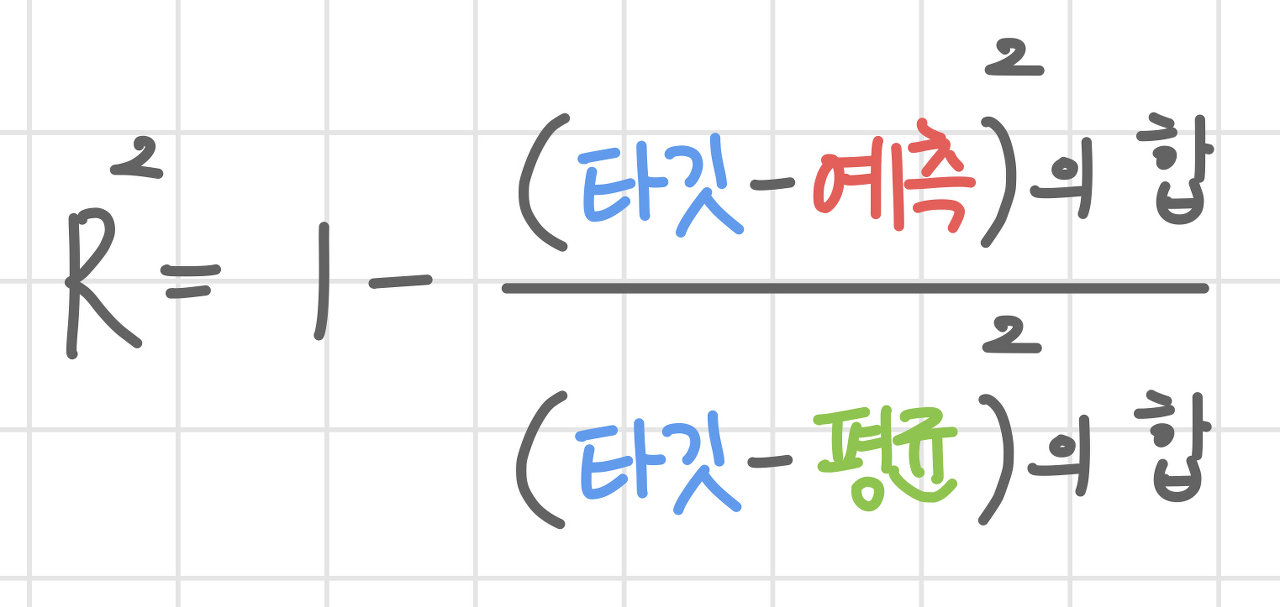

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knr=KNeighborsRegressor(n_neighbors=1)

# train_input, test_input, train_target, test_target = train_test_split(wav_onset, wav_label, random_state = 42)

# 훈련
knr.fit(inputs, outputs)
print("결정 계수 >> ", knr.score(inputs, outputs))

결정 계수 >>  1.0


In [16]:

root = "../data/wavs/test/"
# test = root + "Overhead Sample 30.wav"
test = root + "Snare Sample 30.wav"
# test = root + "Tom Sample 30.wav"

y, sr = librosa.load(test)
features = extract_features(y, sr)
peaks = get_peaks(y, sr)
print(test)
# print(peaks)
input = [features[peaks[0]]]
# input = features

# 예측
prediction = knr.predict(input)
print("prediction>>>", prediction)

# 타깃과 예측의 절댓값 오차를 평균해서 반환
# 테스트 세트에 대한 예측을 만들기

# 테스트 세트에 대한 타깃과 예측의 평균 절댓값 오차를 계산
# mae = mean_absolute_error(test_target, test_prediction)

../data/wavs/test/Snare Sample 30.wav
prediction>>> [2.]
